In [1]:
%matplotlib inline
from auto_reduce import *
import numpy as np
from sympy import symbols

In [2]:
n = 8 # Number of states 
x_init = np.zeros(n)
x_init[6] = 100
x_init[7] = 500
timepoints_ode = np.linspace(0, 40, 100)
error_tol = 1000
nstates_tol = 5
#      x = 0, T1, 1, A1, 2, S1, 3, S2, 4, T2, 5, A2, 6, C1, 7, C2
#      P = 0, beta_S1, 1, l_S1, 2, K_S1, 3, kb, 4, beta_S2, 5, l_S2, 6,
#      K_S2, 7, beta_lac, 8, l_lac, 9, K_lac, 10, beta_tet, 11, l_tet, 12,
#      K_tet, 13, kc, 14, C_max, 15, dc, 16, 17, I, 18, atc, 20,K_tox
P = np.zeros(22)
P[0] = 6
P[1] = 2e-3
P[2] = 430
P[3] = 30
P[4] = 6
P[5] = 2e-3
P[6] = 190
P[7] = 19.8e-3
P[8] = 1.5e-3
P[9] = 1.4e5
P[10] = 14.4e-3
P[11] = 2.1e-4
P[12] = 13
P[13] = 0.6
P[14] = 5500
P[15] = 0.8
P[16] = 1e6 #17 -> 16
P[17] = 324 # 19 -> 17
P[18] = 1 #20 -> 18
P[19] = 0.1 #21 -> 19
P[20] = 1.5 #22 -> 20
P[21] = 0.5 #23 ->21
params_values = P.copy()

params = P
n = 8
x, f, P = system.load_ODE_model(n, len(params_values))

beta_S1 = symbols('beta_S1')
l_S1 = symbols('l_S1')
K_S1 = symbols('K_S1')
kb = symbols('kb')
beta_S2 = symbols('beta_S2')
l_S2 = symbols('l_S2')
K_S2 = symbols('K_S2')
beta_lac = symbols('beta_lac')
l_lac = symbols('l_lac')
K_lac = symbols('K_lac')
beta_tet = symbols('beta_tet')
l_tet = symbols('l_tet')
K_tet = symbols('K_tet')
kc = symbols('kc')
C_max = symbols('C_max')
dc = symbols('dc')
I = symbols('I')
atc = symbols('atc')
K_tox = symbols('K_tox')
d = symbols('d')
d_T = symbols('d_T')
d_S = symbols('d_S')
P = [beta_S1, l_S1, K_S1, kb, beta_S2, l_S2, K_S2, beta_lac, l_lac, 
    K_lac, beta_tet, l_tet, K_tet, kc, C_max, dc, I,
    atc, K_tox, d, d_T, d_S]
y0 = symbols('y0')
y1 = symbols('y1')

# T1 and A1
f[0] = P[0]*(P[1] + x[2]**2/(P[2]+x[2]**2)) - P[3]*x[0]*x[1] - P[20] * x[0]
f[1] = 5*P[4]*(P[5] + x[3]**2/(P[6]+x[3]**2)) - P[20] * x[1] - P[3]*x[0]*x[1]


# f[0] = P[0]*(x[2]**2/(P[2]+x[2]**2)) - P[3]*x[0]*x[1]
# f[1] = P[4]*(x[3]**2/(P[6]+x[3]**2)) - P[3]*x[0]*x[1]

#  S1 and S2 (scaled with cell count)
f[2] = P[7]*(P[8] + P[16]**2/(P[9]+P[16]**2))*x[6] - P[21] * x[2]
f[3] = P[10]*(P[11] + P[17]**2/(P[12]+P[17]**2))*x[7] - P[21] * x[3]

# f[2] = P[7]*(P[16]**2/(P[9]+P[16]**2))*x[6] - P[21] * x[2]
# f[3] = P[10]*(P[17]**2/(P[12]+P[17]**2))*x[7] - P[21] * x[3]

#  T2 and A2
f[4] = P[4]*(P[5] + x[3]**2/(P[6]+x[3]**2)) - P[3]*x[4]*x[5] - P[20] * x[4]
f[5] = 5*P[0]*(P[1] + x[2]**2/(P[2]+x[2]**2)) - P[20] * x[5]-P[3]*x[4]*x[5]

# f[4] = P[4]*(x[3]**2/(P[6]+x[3]**2)) - P[3]*x[4]*x[5] - P[20] * x[4]
# f[5] = P[0]*(x[2]**2/(P[2]+x[2]**2)) - P[20] * x[5]-P[3]*x[4]*x[5]

#  Cell 1 and Cell 2
f[6] = P[13]*(1 - (x[6] + x[7])/P[14])*x[6] - P[15]*x[6]*(x[0]/(P[18] + x[0])) - P[19] * x[6]
f[7] = P[13]*(1 - (x[6] + x[7])/P[14])*x[7] - P[15]*x[7]*(x[4]/(P[18] + x[4])) - P[19] * x[7]

C = np.zeros((2,len(x)), dtype=int)
C[0][6] = 1
C[1][7] = 1
C = C.tolist()

sys = System(x, f, params = P, params_values = params_values, C = C, x_init = x_init)

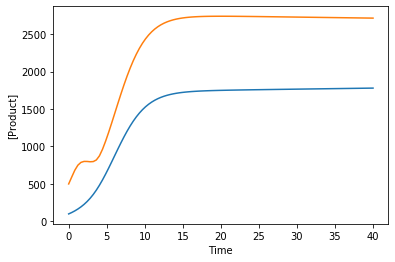

In [3]:
from auto_reduce.utils import get_ODE
sys_ode = get_ODE(sys, timepoints_ode)
sol = sys_ode.solve_system().T
import matplotlib.pyplot as plt
plt.plot(timepoints_ode, np.transpose(np.array(C)@sol))
plt.xlabel('Time')
plt.ylabel('[Product]')
plt.show()

In [4]:
from auto_reduce.utils import get_SSM
timepoints_ssm = np.linspace(0,100,5)
sys_ssm = get_SSM(sys, timepoints_ssm)
Ss = sys_ssm.compute_SSM() # len(timepoints) x len(params) x len(states)


for timepoint 0
for timepoint 1
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 2████████████--------------------------------------| 25.0% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 3█

NameError: name 'nouts' is not defined

In [5]:
nouts = 2
out_Ss = []
for i in range(len(params)):
    out_Ss.append((np.array(C)@(Ss[:,i,:].T)))
out_Ss = np.reshape(np.array(out_Ss), (len(timepoints_ssm), len(params), nouts))

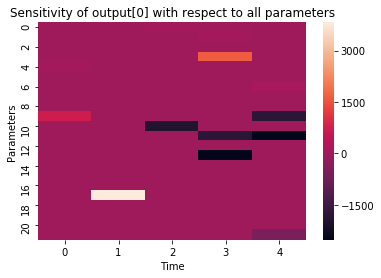

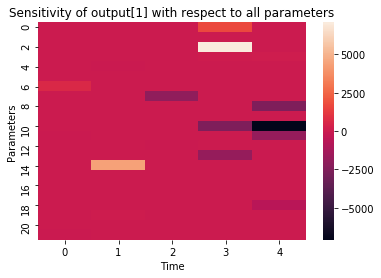

In [6]:
import seaborn as sn
for j in range(nouts):
    sn.heatmap(out_Ss[:,:,j].T)
    plt.xlabel('Time')
    plt.ylabel('Parameters')
    plt.title('Sensitivity of output[{0}] with respect to all parameters'.format(j))
    plt.show()

In [ ]:
from auto_reduce.utils import reduce
timepoints_ssm = np.linspace(0,100,10)
timepoints_ode = np.linspace(0, 100, 100)
sys_reduce = reduce(sys, timepoints_ode, timepoints_ssm)
results = sys_reduce.reduce_Cx()

attempting : [6, 7]
attempting : [0, 6, 7]
attempting : [1, 6, 7]
attempting : [2, 6, 7]
attempting : [3, 6, 7]
attempting : [4, 6, 7]
attempting : [5, 6, 7]
attempting : [0, 1, 6, 7]
attempting : [0, 2, 6, 7]
attempting : [0, 3, 6, 7]
attempting : [0, 4, 6, 7]
for timepoint 0
for timepoint 1
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 2█████---------------------------------------------| 11.1% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for paramete

for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 8██████████████████████████████████████------------| 77.8% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 9████████████████████████████████████████████------| 88.9% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for 

C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\_solvers.py:196: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  RuntimeWarning)
C:\Users\apand\synBio\auto_reduce\auto_reduce\model_reduction.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  Se[j] = max_eigP + 2*len(reduced_ssm.timepoints)*S_metric_max


attempting : [0, 5, 6, 7]
for timepoint 0
for timepoint 1
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 2█████---------------------------------------------| 11.1% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for para

for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 8██████████████████████████████████████------------| 77.8% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 9████████████████████████████████████████████------| 88.9% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parame

for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 6███████████████████████████-----------------------| 55.6% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 7█████████████████████████████████-----------------| 66.7% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for par

for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 4████████████████----------------------------------| 33.3% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 5██████████████████████-----------

for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
for timepoint 0
for timepoint 1
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 2█████---------------------------------------------| 11.1% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0

for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 8██████████████████████████████████████------------| 77.8% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 9████████████████████████████████████████████------| 88.9% Complete
for parameter 6.0
for parameter 0.002
for p

for parameter 1.5
for parameter 0.5
for timepoint 5██████████████████████----------------------------| 44.4% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 6███████████████████████████-----------------------| 55.6% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
fo

for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 3███████████---------------------------------------| 22.2% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 4████████████████----------------------------------| 33.3% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for

for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 3, 4, 6, 7]
for timepoint 0
for timepoint 1
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 2█████---------------------------------------------| 11.1% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for 

for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 8██████████████████████████████████████------------| 77.8% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 9████████████████████████████████████████████------|

for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 5██████████████████████----------------------------| 44.4% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 6███████████████████████████-----------------------| 55.6% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parame

for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 3███████████---------------------------------------| 22.2% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 4████████████████----------------------------------| 33.3% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parame

for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
for timepoint 0
for timepoint 1
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 2█████---------------------------------------------| 11.1% Complete
for parameter 6.0
for parame

for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 8██████████████████████████████████████------------| 77.8% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 9█████████████████████████████████

for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 5██████████████████████----------------------------| 44.4% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 6███████████████████████████-----------------------| 55.6% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for para

for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 3███████████---------------------------------------| 22.2% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 4████████████████----------------------------------| 33.3% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parame

for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [1, 4, 5, 6, 7]
for timepoint 0
for timepoint 1
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 2█████---------------------------------------------| 11.1% Complete
for parameter 6.0
f

for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 8██████████████████████████████████████------------| 77.8% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 9█████████████████████████████████

for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 5██████████████████████----------------------------| 44.4% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 6███████████████████████████-----------------------| 55.6% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parame

for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 3███████████---------------------------------------| 22.2% Complete
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
for timepoint 4████████████████----------------------------------| 33.3% Complete
for 

for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
for parameter 1000000.0
for parameter 324.0
for parameter 1.0
for parameter 0.1
for parameter 1.5
for parameter 0.5
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
for timepoint 0
for timepoint 1
for parameter 6.0
for parameter 0.002
for parameter 430.0
for parameter 30.0
for parameter 6.0
for parameter 0.002
for parameter 190.0
for parameter 0.0198
for parameter 0.0015
for parameter 140000.0
for parameter 0.0144
for parameter 0.00021
for parameter 13.0
for parameter 0.6
for parameter 5500.0
for parameter 0.8
